**File : Filter Batas**

**Authors : Syahrul Fikri**

**NIM : 1207070121**

**Kelas : Pengolahan Citra Digital-C**

**Teknik Elektro Fakultas Sains dan Teknologi UIN Sunan Gunung Djati Bandung**

In [15]:
#IMPORT LIBRARY
import matplotlib.pyplot as plt #Pada bagian ini menambahkan fungsi library yang akan digunakan dalam proses pengaplikasian program dengan library matplotlib maka akan dapat menvisualisasikan objek gambar yang akan ditampilkan
%matplotlib inline
#Fungsi matplotlib inline merupakan pengaturan fungsi tambahan untuk notebook agar setiap hasil plot dimunculkan pada setiap code
from skimage import data #Pada bagian ini menambahkan library berupa data file yang dimiliki untuk dapat digunakan dalam proses program
from skimage.io import imread #Pada bagian ini memanfaatkan library skimage untuk membaca data file dari source pribadi
from skimage.color import rgb2gray #Pada bagian ini memanfaatkan library skimage untuk melakukan konversi warna gambar dari RGB ke Gray
import numpy as np #Pada bagian ini menambahkan library yang akan digunakan dalam proses pengaplikasian program yang akan digunakan dalam program yang memanfaatkan scientific computing

Shape citra 1 :  (252, 250)
Shape citra 2 :  (636, 512)


Text(0.5, 1.0, 'Citra 2')

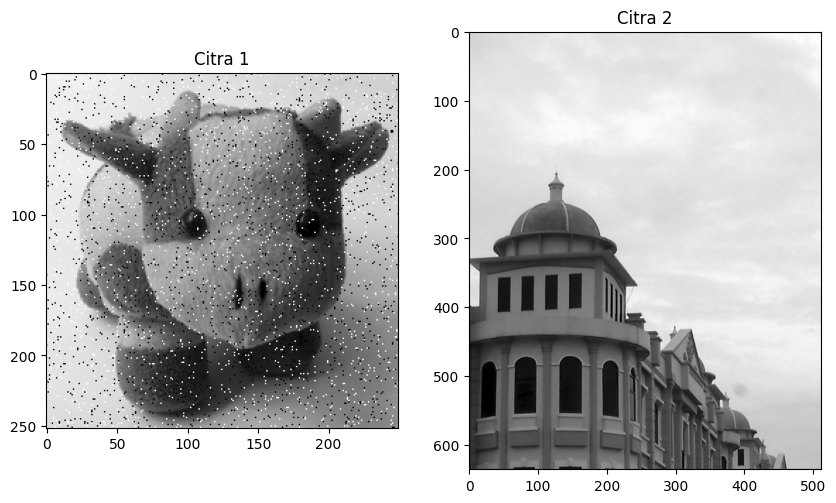

In [16]:
#LOAD & PLOT INPUT IMAGE
citra1 = imread(fname="boneka2.tif") #Melakukan inisialisasi untuk file gambar "citra1" dengan membaca data gambar dari source pribadi dengan argumen imread dalam format gambar ".tiff" yang memiliki kompresi lossless yang relatif baik untuk gambar dua level (hitam&putih)
citra2 = imread(fname="gedung.tif") #Melakukan inisialisasi untuk file gambar "citra2" dengan membaca data gambar dari source pribadi dengan argumen imread

print('Shape citra 1 : ', citra1.shape) #Mencetak hasil pembacaan untuk resolusi pada data variabel "citra1"
print('Shape citra 2 : ', citra2.shape) #Mencetak hasil pembacaan untuk resolusi pada data variabel "citra2"

fig, axes = plt.subplots(1, 2, figsize=(10, 10)) #Mendefinisikan tampilan ploting pada figure size dengan parameter 10x10 dengan tuple gambar yang disajikan berada pada 1 baris dan 2 kolom
ax = axes.ravel() #Mendeskripsikan variabel "ax" dengan mengembalikan array yang berdekatan pada setiap urutan axes

ax[0].imshow(citra1, cmap = 'gray') #Menampilkan data variabel "citra1"pada indeks 0 dengan kontrol warna menjadi abu-abu dengan argumen cmap
ax[0].set_title("Citra 1") #Menampilkan judul gambar pada indeks 0
ax[1].imshow(citra2, cmap = 'gray') #Menampilkan data variabel "citra1"pada indeks 1 dengan kontrol warna menjadi abu-abu dengan argumen cmap
ax[1].set_title("Citra 2") #Menampilkan judul histogram pada indeks 1

In [17]:
#CODE ASAL MATLAB
#for baris=2 : tinggi-1
#    for kolom=2 : lebar-1
#        minPiksel = min([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1) ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);
#        
#        maksPiksel = max([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1)    ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);    
#            
#        if F(baris, kolom) < minPiksel
#           G(baris, kolom) = minPiksel;
#        else
#            if F(baris, kolom) > maksPiksel
#                G(baris, kolom) = maksPiksel;
#            else
#                G(baris, kolom) = F(baris, kolom);
#            end
#        end    
#    end
#end

In [18]:
#MENYIAPKAN VARIABEL OUTPUT
copyCitra1 = citra1.copy() #Menginisialisasi variabel baru "copyCitra1" dengan menyalin data gambar "citra1"
copyCitra2 = citra2.copy() #Menginisialisasi variabel baru "copyCitra2" dengan menyalin data gambar "citra2"

m1,n1 = copyCitra1.shape #Mendeskripsikan variabel m1,n1 berdasarkan resolusi dari salinan gambar "citra1"
output1 = np.empty([m1, n1]) #Menginisialisasi variabel baru untuk "output1" dengan mengembalikan array baru dari bentuk dan tipe tertentu dengan fungsi numpy yaitu argumen "np.empty"

m2,n2 = copyCitra2.shape #Mendeskripsikan variabel m2,n2 berdasarkan resolusi dari salinan gambar "citra2"
output2 = np.empty([m2, n2]) #Menginisialisasi variabel baru untuk "output2" dengan mengembalikan array baru dari bentuk dan tipe tertentu dengan fungsi numpy yaitu argumen "np.empty"
print('Shape copy citra 1 : ', copyCitra1.shape) #Mencetak hasil pembacaan untuk resolusi pada data variabel "copyCitra1"
print('Shape output citra 1 : ', output1.shape) #Mencetak hasil pembacaan untuk resolusi pada data variabel "output1"

print('m1 : ',m1) #Mencetak hasil pembacaan untuk resolusi pada data variabel "citra1" pada bagian data m1
print('n1 : ',n1) #Mencetak hasil pembacaan untuk resolusi pada data variabel "citra1" pada bagian data n1
print() #Mencetak nilai yang terbaca untuk masing-masing variabel

print('Shape copy citra 2 : ', copyCitra2.shape) #Mencetak hasil pembacaan untuk resolusi pada data variabel "copyCitra2"
print('Shape output citra 2 : ', output2.shape) #Mencetak hasil pembacaan untuk resolusi pada data variabel "output2"

print('m2 : ',m2) #Mencetak hasil pembacaan untuk resolusi pada data variabel "citra2" pada bagian data m2
print('n2 : ',n2) #Mencetak hasil pembacaan untuk resolusi pada data variabel "citra2" pada bagian data n2
print() #Mencetak nilai yang terbaca untuk masing-masing variabel

Shape copy citra 1 :  (252, 250)
Shape output citra 1 :  (252, 250)
m1 :  252
n1 :  250

Shape copy citra 2 :  (636, 512)
Shape output citra 2 :  (636, 512)
m2 :  636
n2 :  512



In [19]:
#PROSES FILTER BATAS PADA CITRA INPUT 1
for baris in range(0, m1-1): #Penggunaan fungsi for untuk melakukan perulangan variabel untuk elemen baris dengan argumen range yang berisikan nilai berisikan array dari 0 hingga array variabel "m1-1"
    for kolom in range(0, n1-1): #Penggunaan fungsi for untuk melakukan perulangan variabel untuk elemen kolom dengan argumen range yang berisikan nilai berisikan array dari 0 hingga array variabel "n1-1"
       
        a1 = baris #Mendeskripsikan variabel "a1" dengan nilai baris
        b1 = kolom #Mendesripsikan variabel "b1" dengan nilai kolom
        
        arr1 = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1],  \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])
        #Mendefinisikan variabel arr1 yang berisikan yang berisikan nilai pemetaan dari setiap indeks pixel 

        minPiksel = np.amin(arr1); #Mendefinisikan variabel untuk array piksel minimum        
        maksPiksel = np.amax(arr1); #Mendefinisikan variabel untuk array piksel maksimum  
            
        if copyCitra1[baris, kolom] < minPiksel : #Menyatakan variabel permisalan jika array piksel gambar lebih kecil dari batas nilai array piksel minimum
            output1[baris, kolom] = minPiksel #Maka array piksel pada output akan sama dengan array piksel minimum
        else :
            if copyCitra1[baris, kolom] > maksPiksel : #Menyatakan variabel permisalan jika array piksel gambar lebih besar dari batas nilai array piksel maksimum
                output1[baris, kolom] = maksPiksel #Maka array piksel pada output akan sama dengan array piksel maksimum
            else :
                output1[baris, kolom] = copyCitra1[baris, kolom] #Menyatakan variabel kemungkinan lain jika permisalan sebelumnya tidak berhasil maka array piksel output akan sama dengan array piksel inputnya

In [20]:
#PROSES FILTER BATAS PADA CITRA INPUT 2
for baris1 in range(0, m2-1): #Penggunaan fungsi for untuk melakukan perulangan variabel untuk elemen baris dengan argumen range yang berisikan nilai berisikan array dari 0 hingga array variabel "m2-1"
    for kolom1 in range(0, n2-1):#Penggunaan fungsi for untuk melakukan perulangan variabel untuk elemen kolom dengan argumen range yang berisikan nilai berisikan array dari 0 hingga array variabel "n2-1"
        
        a2 = baris1 #Mendeskripsikan variabel "a2" dengan nilai baris
        b2 = kolom1 #Mendesripsikan variabel "b2" dengan nilai kolom
        
        arr2 = np.array([copyCitra2[a2-1, b2-1], copyCitra2[a2-1, b2], copyCitra2[a2, b2+1], \
            copyCitra2[a2, b2-1], copyCitra2[a2, b2+1], copyCitra2[a2+1, b2-1],  \
            copyCitra2[a2+1, b2], copyCitra2[a2+1, b2+1]])
        #Mendefinisikan variabel arr2 yang berisikan yang berisikan nilai pemetaan dari setiap indeks pixel 
       
        minPiksel = np.amin(arr2); #Mendefinisikan variabel untuk array piksel minimum     
        maksPiksel = np.amax(arr2); #Mendefinisikan variabel untuk array piksel maksimum
            
        if copyCitra2[baris1, kolom1] < minPiksel : #Maka array piksel pada output akan sama dengan array piksel maksimum
            output2[baris1, kolom1] = minPiksel #Maka array piksel pada output akan sama dengan array piksel minimum
        else :
            if copyCitra2[baris1, kolom1] > maksPiksel : #Menyatakan variabel permisalan jika array piksel gambar lebih besar dari batas nilai array piksel maksimum
                output2[baris1, kolom1] = maksPiksel #Maka array piksel pada output akan sama dengan array piksel maksimum
            else :
                output2[baris1, kolom1] = copyCitra2[baris1, kolom1] #Menyatakan variabel kemungkinan lain jika permisalan sebelumnya tidak berhasil maka array piksel output akan sama dengan array piksel inputnya

Text(0.5, 1.0, 'Output Citra 2')

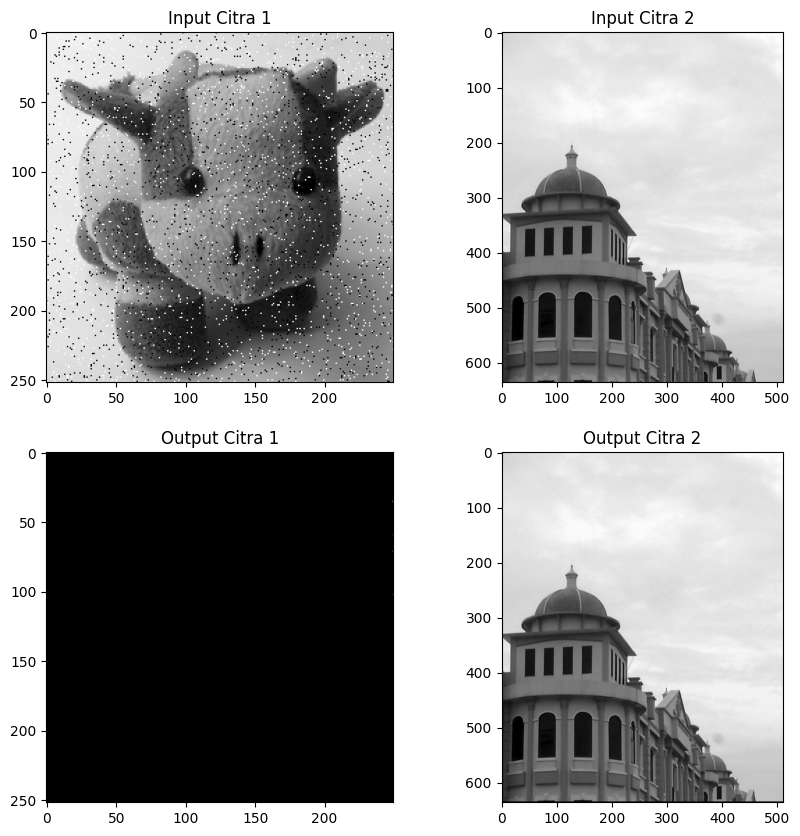

In [21]:
#PLOT CITRA INPUT DAN OUTPUT HASIL DARI FILTER BATAS
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) #Mendefinisikan tampilan ploting pada figure size dengan parameter 10x10 dengan tuple gambar yang disajikan berada pada 2 baris dan 2 kolom
ax = axes.ravel() #Mendeskripsikan variabel "ax" dengan mengembalikan array yang berdekatan pada setiap urutan axes

ax[0].imshow(citra1, cmap = 'gray') #Menampikan Menampilkan data variabel "citra1" pada indeks 0 dengan kontrol warna menjadi abu-abu dengan argumen cmap
ax[0].set_title("Input Citra 1") #Menampilkan judul gambar pada indeks 0

ax[1].imshow(citra2, cmap = 'gray') #Menampikan Menampilkan data variabel "citra1" pada indeks 0 dengan kontrol warna menjadi abu-abu dengan argumen cmap
ax[1].set_title("Input Citra 2") #Menampilkan judul gambar pada indeks 0

ax[2].imshow(output1, cmap = 'gray') #Menampikan Menampilkan data variabel "citra1" pada indeks 0 dengan kontrol warna menjadi abu-abu dengan argumen cmap
ax[2].set_title("Output Citra 1") #Menampilkan judul gambar pada indeks 0

ax[3].imshow(output2, cmap = 'gray') #Menampikan Menampilkan data variabel "citra1" pada indeks 0 dengan kontrol warna menjadi abu-abu dengan argumen cmap
ax[3].set_title("Output Citra 2") #Menampilkan judul gambar pada indeks 0